# Text Analytics Coursework 

In [333]:
%load_ext autoreload
%autoreload 2

# Use HuggingFace's datasets library to access the Emotion dataset
from datasets import load_dataset
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Social Media Emotion Classification

The dataset classifies Tweets into anger, joy, optimism or sadness.

First we need to load the data. The data is already split into train, validation and test. The _validation_ set (also called 'development' set or 'devset') can be used to compute performance of your model when tuning hyperparameters, optimising combinations of features, or looking at the errors your model makes before improving it. This allows you to hold out the test set (i.e., not to look at it at all when developing your method) to give a fair evaluation of the model and how well it generalises to new examples. This avoids tuning the model to specific examples in the test set. An alternative approach to validation is to not use a single fixed validation set, but instead use [cross validation](https://scikit-learn.org/stable/modules/cross_validation.html). 

In [334]:
cache_dir = "./data_cache"

train_dataset = load_dataset(
    "tweet_eval",
    name="emotion",
    split="train",
    cache_dir=cache_dir,
)
print(f"Training dataset with {len(train_dataset)} instances loaded")


val_dataset = load_dataset(
    "tweet_eval",
    name="emotion",
    split="validation",
    cache_dir=cache_dir,
)
print(f"Development/validation dataset with {len(val_dataset)} instances loaded")


test_dataset = load_dataset(
    "tweet_eval",
    name="emotion",
    split="test",
    cache_dir=cache_dir,
)
print(f"Test dataset with {len(test_dataset)} instances loaded")

# Access the input text and target labels like this...
train_texts = train_dataset['text']
train_labels = train_dataset['label']

val_texts = val_dataset['text']
val_labels = val_dataset['label']

test_texts = test_dataset['text']
test_labels = test_dataset['label']

Training dataset with 3257 instances loaded
Development/validation dataset with 374 instances loaded
Test dataset with 1421 instances loaded


In [171]:
# Define a dictionary to map numerical labels to string representations
label_mapping = {
    0: "anger",
    1: "joy",
    2: "optimism",
    3: "sadness"
}

# Suppose you have a numerical label

# Map the numerical label to its string representation
train_labels = [label_mapping[label] for label in train_labels]
test_labels = [label_mapping[label] for label in test_labels]
val_labels = [label_mapping[label] for label in val_labels]


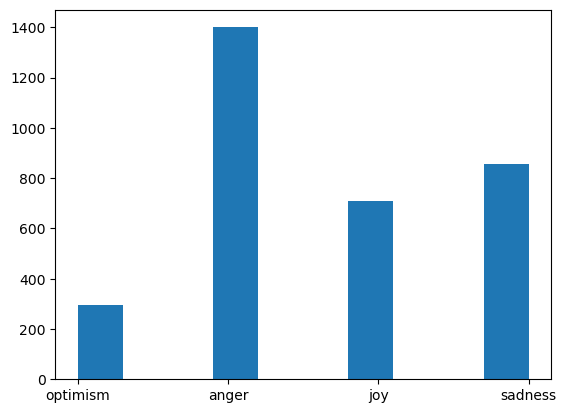

In [19]:
import matplotlib.pyplot as plt
plt.hist(train_labels)

plt.show()

# 1.1 Non Neural Network Approach: LogisticRegression

## 1.Logistic regression with lemmatizer

In [319]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize

# CountVectorizer can do its own tokenization, but for consistency we want to
# carry on using WordNetTokenizer. 

class LemmaTokenizer(object):  # this 'tokenizer' will also do additional preprocessing steps, namely, lemmatize verbs and adjectives
    
    def __init__(self):
        self.wnl = WordNetLemmatizer()
        
    def __call__(self, tweets):
        return [self.wnl.lemmatize(self.wnl.lemmatize(tok, pos='v'), pos='a') for tok in word_tokenize(tweets)]
    
vectorizer = CountVectorizer(tokenizer=LemmaTokenizer(), ngram_range=(1, 2))


vectorizer.fit(train_texts)  # Learn the vocabulary
X_train = vectorizer.transform(train_texts) # extract training set bags of words
X_val = vectorizer.transform(val_texts)
X_test = vectorizer.transform(test_texts)  # extract test set bags of words



# WRITE YOUR CODE HERE
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, train_labels)
y_val_pred = classifier.predict(X_val)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

acc = accuracy_score(val_labels, y_val_pred)
print(f'Accuracy = {acc}')

prec = precision_score(val_labels, y_val_pred, average='macro')
print(f'Precision (macro average) = {prec}')

rec = recall_score(val_labels, y_val_pred, average='macro')
print(f'Recall (macro average) = {rec}')

f1 = f1_score(val_labels, y_val_pred, average='macro')
print(f'F1 score (macro average) = {f1}')

# We can get all of these with a per-class breakdown using classification_report:
print(classification_report(val_labels, y_val_pred))

/opt/anaconda3/envs/text_analytics/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Accuracy = 0.6737967914438503
Precision (macro average) = 0.6406724494411061
Recall (macro average) = 0.5885065456884712
F1 score (macro average) = 0.6047160410950647
              precision    recall  f1-score   support

       anger       0.68      0.84      0.75       160
         joy       0.79      0.55      0.65        97
    optimism       0.48      0.36      0.41        28
     sadness       0.61      0.61      0.61        89

    accuracy                           0.67       374
   macro avg       0.64      0.59      0.60       374
weighted avg       0.68      0.67      0.67       374



In [56]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize

# CountVectorizer can do its own tokenization, but for consistency we want to
# carry on using WordNetTokenizer. 
vectorizer = CountVectorizer(tokenizer=word_tokenize)  # construct the vectorizer

vectorizer.fit(train_texts)  # Learn the vocabulary
X_train = vectorizer.transform(train_texts) # extract training set bags of words
X_val = vectorizer.transform(val_texts)
X_test = vectorizer.transform(test_texts)  # extract test set bags of words

/opt/anaconda3/envs/text_analytics/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [70]:
vocabulary = vectorizer.vocabulary_

## 1.2 LogisticRegression without feature

In [65]:
# WRITE YOUR CODE HERE

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, train_labels)

LogisticRegression()

In [61]:
# WRITE YOUR CODE HERE

y_val_pred = classifier.predict(X_val)

In [64]:

# WRITE YOUR CODE HERE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

acc = accuracy_score(val_labels, y_val_pred)
print(f'Accuracy = {acc}')

prec = precision_score(val_labels, y_val_pred, average='macro')
print(f'Precision (macro average) = {prec}')

rec = recall_score(val_labels, y_val_pred, average='macro')
print(f'Recall (macro average) = {rec}')

f1 = f1_score(val_labels, y_val_pred, average='macro')
print(f'F1 score (macro average) = {f1}')

# We can get all of these with a per-class breakdown using classification_report:
print(classification_report(val_labels, y_val_pred))

Accuracy = 0.6443850267379679
Precision (macro average) = 0.6046152518978607
Recall (macro average) = 0.573580354040145
F1 score (macro average) = 0.5850716759482986
              precision    recall  f1-score   support

       anger       0.68      0.76      0.72       160
         joy       0.67      0.56      0.61        97
    optimism       0.48      0.36      0.41        28
     sadness       0.60      0.62      0.61        89

    accuracy                           0.64       374
   macro avg       0.60      0.57      0.59       374
weighted avg       0.64      0.64      0.64       374



## 1.3 Logistic Regression with Custom tokenizer  (LR+Bigram)

In [393]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))



# Custom tokenizer with preprocessing steps
def custom_tokenizer(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove user mentions
    text = re.sub(r'@\w+', '', text)
    
    tokens = word_tokenize(text)
    
    # Remove stop words
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatize tokens
#     tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return tokens


# Construct the vectorizer with custom tokenizer
vectorizer = CountVectorizer(tokenizer=custom_tokenizer, ngram_range=(1, 2))

# Assuming train_texts, val_texts, and test_texts are already defined
vectorizer.fit(train_texts)  # Learn the vocabulary
X_train = vectorizer.transform(train_texts)  # Extract training set bags of words
X_val = vectorizer.transform(val_texts)  # Extract validation set bags of words
X_test = vectorizer.transform(test_texts)  # Extract test set bags of words



from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Train the Logistic Regression classifier
classifier = LogisticRegression()
classifier.fit(X_train, train_labels)
y_val_pred = classifier.predict(X_val)

# Evaluate the model
acc = accuracy_score(val_labels, y_val_pred)
print(f'Accuracy = {acc}')

prec = precision_score(val_labels, y_val_pred, average='macro')
print(f'Precision (macro average) = {prec}')

rec = recall_score(val_labels, y_val_pred, average='macro')
print(f'Recall (macro average) = {rec}')

f1 = f1_score(val_labels, y_val_pred, average='macro')
print(f'F1 score (macro average) = {f1}')

# Print a classification report with a per-class breakdown
print(classification_report(val_labels, y_val_pred))



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dangngocbach/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/opt/anaconda3/envs/text_analytics/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Accuracy = 0.6764705882352942
Precision (macro average) = 0.6750111676940946
Recall (macro average) = 0.5834861246711125
F1 score (macro average) = 0.6101728387479041
              precision    recall  f1-score   support

           0       0.66      0.85      0.75       160
           1       0.71      0.57      0.63        97
           2       0.64      0.32      0.43        28
           3       0.68      0.60      0.63        89

    accuracy                           0.68       374
   macro avg       0.68      0.58      0.61       374
weighted avg       0.68      0.68      0.67       374



## 1.4 Logistic Regerssion custom tokenizer with Lexicon (LR+Lexi)

In [340]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

analyser = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/dangngocbach/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [342]:
testwords = ['happy', 'wonderful', 'horrible', 'boring', 'tablecloth', 'not']

for word in testwords:
    if word in analyser.lexicon:
        print(f'{word}: {analyser.lexicon[word]}')
    else:
        print(f'{word}: NOT IN LEXICON')

happy: 2.7
wonderful: 2.7
horrible: -2.5
boring: -1.3
tablecloth: NOT IN LEXICON
not: NOT IN LEXICON


In [343]:
# Print out some of the features in the vocabulary:
print(list(vectorizer.vocabulary_)[:20])

vocabulary = vectorizer.vocabulary_

lex_pos_scores = np.zeros((1, len(vocabulary)))
lex_neg_scores = np.zeros((1, len(vocabulary)))

# get the Vader lexicon scores for each word in our vocabulary
for i, term in enumerate(vocabulary):
    if term in analyser.lexicon and analyser.lexicon[term] > 0:
        lex_pos_scores[0, i] = 1
    elif term in analyser.lexicon and analyser.lexicon[term] < 0:
        lex_neg_scores[0, i] = 1

['“', 'worry', 'payment', 'problem', 'may', 'never', "'", '.', 'joyce', 'meyer', '#', 'motivation', 'leadership', '“ worry', 'worry payment', 'payment problem', 'problem may', 'may never', "never '", "' ."]


In [344]:
# Compute the scores for each instance in the data set. 

# Multiply the lexicon scores by the feature vectors, then sum over the 
# vocabulary to get the total positive and total negative counts:
lex_pos_train = np.sum(X_train.multiply(lex_pos_scores), axis=1)
lex_pos_test = np.sum(X_test.multiply(lex_pos_scores), axis=1)
lex_pos_val = np.sum(X_val.multiply(lex_pos_scores), axis=1)


lex_neg_train = np.sum(X_train.multiply(lex_neg_scores), axis=1)
lex_neg_test = np.sum(X_test.multiply(lex_neg_scores), axis=1)
lex_neg_val = np.sum(X_val.multiply(lex_neg_scores), axis=1)


In [345]:
from scipy.sparse import hstack

X_train = hstack((X_train, lex_pos_train, lex_neg_train))
X_test = hstack((X_test, lex_pos_test, lex_neg_test))
X_val = hstack((X_val, lex_pos_val, lex_neg_val))

In [347]:
### WRITE YOUR OWN CODE HERE
logistic = LogisticRegression()
classifier.fit(X_train, train_labels)

y_test_pred = classifier.predict(X_val)


acc = accuracy_score(val_labels, y_val_pred)
print(f'Accuracy = {acc}')

prec = precision_score(val_labels, y_val_pred, average='macro')
print(f'Precision (macro average) = {prec}')

rec = recall_score(val_labels, y_val_pred, average='macro')
print(f'Recall (macro average) = {rec}')

f1 = f1_score(val_labels, y_val_pred, average='macro')
print(f'F1 score (macro average) = {f1}')

# We can get all of these with a per-class breakdown using classification_report:
print(classification_report(val_labels, y_val_pred))

Accuracy = 0.6764705882352942
Precision (macro average) = 0.6750111676940946
Recall (macro average) = 0.5834861246711125
F1 score (macro average) = 0.6101728387479041
              precision    recall  f1-score   support

           0       0.66      0.85      0.75       160
           1       0.71      0.57      0.63        97
           2       0.64      0.32      0.43        28
           3       0.68      0.60      0.63        89

    accuracy                           0.68       374
   macro avg       0.68      0.58      0.61       374
weighted avg       0.68      0.68      0.67       374



## Hyper tune logistic regression

In [350]:
from sklearn.model_selection import train_test_split, GridSearchCV

LR = LogisticRegression()
LRparam_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    # 'max_iter': list(range(100,800,100)),
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}

grid_search = GridSearchCV(LR, LRparam_grid, refit=True, verbose=2, cv=3)

# Fit the model
grid_search.fit(X_train, train_labels)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] END ...............C=0.01, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...............C=0.01, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...............C=0.01, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.2s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.2s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.2s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ................C=0.1, penalty=l2, solv

In [351]:
#Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}

    
y_test_pred = grid_search.predict(X_test)

# Evaluate the model
acc = accuracy_score(test_labels, y_test_pred)
print(f'Accuracy = {acc}')

prec = precision_score(test_labels, y_test_pred, average='macro')
print(f'Precision (macro average) = {prec}')

rec = recall_score(test_labels, y_test_pred, average='macro')
print(f'Recall (macro average) = {rec}')

f1 = f1_score(test_labels, y_test_pred, average='macro')
print(f'F1 score (macro average) = {f1}')

# Print a classification report with a per-class breakdown
print(classification_report(test_labels, y_test_pred))


Accuracy = 0.6622097114707952
Precision (macro average) = 0.6258138287619587
Recall (macro average) = 0.567679144687884
F1 score (macro average) = 0.5803576215348373
              precision    recall  f1-score   support

           0       0.67      0.81      0.73       558
           1       0.69      0.61      0.64       358
           2       0.49      0.21      0.30       123
           3       0.66      0.64      0.65       382

    accuracy                           0.66      1421
   macro avg       0.63      0.57      0.58      1421
weighted avg       0.65      0.66      0.65      1421



In [82]:
error_indexes = y_test_pred != test_labels  # compare predictions to gold labels

# get the text of reviews where the classifier made an error:
reviews_err = np.array(test_texts)[error_indexes]

# WRITE YOUR CODE HERE
pred_err = y_test_pred[error_indexes]
gold_err = np.array(test_labels)[error_indexes]

for i in range(20):  # just print the first ten
    print(f'Review: {reviews_err[i]}; true label = {gold_err[i]}, prediction = {pred_err[i]}.')

Review: #Deppression is real. Partners w/ #depressed people truly dont understand the depth in which they affect us. Add in #anxiety &amp;makes it worse; true label = sadness, prediction = anger.
Review: What makes you feel #joyful?; true label = joy, prediction = sadness.
Review: i am revolting.; true label = anger, prediction = sadness.
Review: @user @user #cmbyn does screen  August 4 &amp; 6 at #miff; true label = sadness, prediction = joy.
Review: Pressured. 😦; true label = sadness, prediction = anger.
Review: @user #shocking loss of talented young man#prayers#pray for his family; true label = sadness, prediction = anger.
Review: @user @user Americans do not spank their children, and they are a God fearing people who knows the biggest sin is hypocrisy.; true label = optimism, prediction = anger.
Review: Favorite character who's name starts with the letter M?\n #Prisonbreak5  #The100 #GreysAnatomy; true label = joy, prediction = anger.
Review: I'm so nervous I could puke + my body t

In [164]:
# remove special character also remove emoji - lower score - 

## II. Neural network

In [264]:
import numpy as np
import torch
from datasets import load_dataset
from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import word2vec
from gensim.utils import tokenize
import gensim.downloader
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [265]:
def tok_text(sample):
    sample["tokens"] = list(tokenize(sample['text']))
    return sample

tok_train_dataset = train_dataset.map(tok_text)

tok_train_dataset

Dataset({
    features: ['text', 'label', 'tokens'],
    num_rows: 3257
})

In [266]:
from gensim.corpora import Dictionary

dictionary = Dictionary(tok_train_dataset["tokens"]) # construct word<->id mappings - it does it in alphabetical order
print(dictionary)

Dictionary<9310 unique tokens: ['Joyce', 'Meyer', 'Worry', 'a', 'down']...>


In [267]:
# WRITE YOUR CODE HERE

# tokenize training set and convert to input IDs.
def encode_text(sample):
   
    input_ids = []
    for token in sample["tokens"]:
        if token in dictionary.token2id:  # Skip words that are not in the vocabulary.
            input_ids.append(dictionary.token2id[token] + 1) 
            
    sample['input_ids'] = input_ids 
    return sample

# The map method of the dataset object takes a function as its argument, 
# and applies that function to each document in the dataset.
pre_train_dataset = tok_train_dataset.map(encode_text)
len(pre_train_dataset)  # length of preprocessed training dataset

pre_train_dataset

Map:   0%|          | 0/3257 [00:00<?, ? examples/s]

Dataset({
    features: ['text', 'label', 'tokens', 'input_ids'],
    num_rows: 3257
})

Mean of the document length: 16.516733190052197
Median of the document length: 17.0
Maximum document length: 34


(array([120., 257., 400., 519., 404., 481., 620., 337., 105.,  14.]),
 array([ 1. ,  4.3,  7.6, 10.9, 14.2, 17.5, 20.8, 24.1, 27.4, 30.7, 34. ]),
 <BarContainer object of 10 artists>)

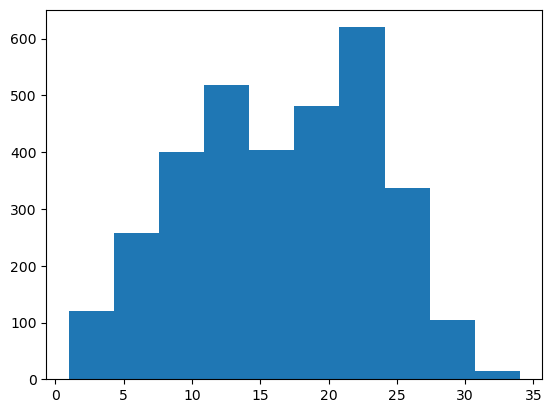

In [268]:
rv_l = [len(doc) for doc in pre_train_dataset['input_ids']]
print('Mean of the document length: {}'.format(np.mean(rv_l)))
print('Median of the document length: {}'.format(np.median(rv_l)))
print('Maximum document length: {}'.format(np.max(rv_l)))

plt.hist(rv_l)

In [269]:
sequence_length = 20  # truncate all docs longer than this. Pad all docs shorter than this.

def pad_text(sample):
    ###WRITE YOUR OWN CODE HERE

    if len(sample['input_ids']) >= sequence_length:
        sample['input_ids'] = sample['input_ids'][:sequence_length]
    else:
        sample['input_ids'] = [0]*(sequence_length-len(sample['input_ids'])) + sample['input_ids']
    ##########
    return sample

# The map method will call pad_text for every document in the dataset
pad_train_dataset = pre_train_dataset.map(pad_text)

Map:   0%|          | 0/3257 [00:00<?, ? examples/s]

In [270]:
from torch.utils.data import DataLoader, TensorDataset

batch_size = 64

# convert from the Huggingface format to a TensorDataset so we can use the mini-batch sampling functionality
def convert_to_data_loader(dataset, num_classes):
    # convert from list to tensor
    input_tensor = torch.from_numpy(np.array(dataset['input_ids']))
    label_tensor = torch.from_numpy(np.array(dataset['label'])).long()
    tensor_dataset = TensorDataset(input_tensor, label_tensor)
    loader = DataLoader(tensor_dataset, batch_size=batch_size, shuffle=True)

    return loader

num_classes = len(np.unique(pad_train_dataset["label"]))   # number of possible labels 

train_loader = convert_to_data_loader(pad_train_dataset, num_classes)


In [353]:
pre_dev_dataset = val_dataset.map(tok_text).map(encode_text)
pad_dev_dataset = pre_dev_dataset.map(pad_text)
dev_loader = convert_to_data_loader(pad_dev_dataset, num_classes)

pre_test_dataset = test_dataset.map(tok_text).map(encode_text)
pad_test_dataset = pre_test_dataset.map(pad_text)
test_loader = convert_to_data_loader(pad_test_dataset, num_classes)


## Building neural network:

In [354]:
from torch import nn

class FFTextClassifier(nn.Module):
    
    def __init__(self, vocab_size, sequence_length, embedding_size, hidden_size, num_classes):
        super(FFTextClassifier, self).__init__()

        self.embedding_size = embedding_size

        # Here we just need to construct the components of our network. We don't need to connect them together yet.
        self.embedding_layer = nn.Embedding(vocab_size, embedding_size) # embedding layer
        
        ### COMPLETE THE CODE HERE: WRITE IN THE MISSING ARGUMENTS SPECIFYING THE DIMENSIONS OF EACH LAYER
        self.hidden_layer = nn.Linear(embedding_size*sequence_length, hidden_size) # Fully connected hidden layer
        self.activation = nn.ReLU() # Hidden layer
        ##########
        
        self.output_layer = nn.Linear(hidden_size, num_classes) # Fully connected output layer

        
        
    def forward (self, input_words):
        # Input dimensions are:  (batch_size, seq_length)
        embedded_words = self.embedding_layer(input_words)  # (batch_size, seq_length, embedding_size)

        # flatten the sequence of embedding vectors for each document into a single vector.
        embedded_words = embedded_words.reshape(embedded_words.shape[0], sequence_length*self.embedding_size)  # batch_size, seq_length*embedding_size

        z = self.hidden_layer(embedded_words)   # (batch_size, hidden_size)
        
        ### ADD THE MISSING LINE HERE
        h = self.activation(z)                  # (batch_size, hidden_size)
        ########

        output = self.output_layer(h)                      # (batch_size, num_classes)

        # Notice we haven't applied a softmax activation to the output layer -- it's not required by Pytorch's loss function.

        return output

In [355]:
vocab_size = len(dictionary) + 1  # add one for the padding tokens
embedding_size = 25  # number of dimensions for embeddings
hidden_size = 16 # number of hidden units


###WRITE YOUR OWN CODE HERE
ff_classifier_model = FFTextClassifier(vocab_size, sequence_length, embedding_size, hidden_size, num_classes)

In [356]:
from torch import optim

def train_nn(num_epochs, model, train_dataloader, dev_dataloader):
    
    learning_rate = 0.0005  # learning rate for the gradient descent optimizer, related to the step size

    loss_fn = nn.CrossEntropyLoss()  # create loss function object
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)  # create the optimizer
    
    all_train_losses = []
    all_dev_losses = []
    
    for e in range(num_epochs):
        # Track performance on the training set as we are learning...
        total_correct = 0
        total_trained = 0
        train_losses = []

        model.train()  # Put the model in training mode.

        for i, (batch_input_ids, batch_labels) in enumerate(train_dataloader):
            # Iterate over each batch of data
            # print(f'batch no. = {i}')

            optimizer.zero_grad()  # Reset the optimizer

            # Use the model to perform forward inference on the input data.
            # This will run the forward() function.
            output = model(batch_input_ids)

            # Compute the loss for the current batch of data
            batch_loss = loss_fn(output, batch_labels)

            # Perform back propagation to compute the gradients with respect to each weight
            batch_loss.backward()

            # Update the weights using the compute gradients
            optimizer.step()

            # Record the loss from this sample to keep track of progress.
            train_losses.append(batch_loss.item())

            # Count correct labels so we can compute accuracy on the training set
            predicted_labels = output.argmax(1)
            total_correct += (predicted_labels == batch_labels).sum().item()
            total_trained += batch_labels.size(0)

        train_accuracy = total_correct/total_trained*100

        print("Epoch: {}/{}".format((e+1), num_epochs),
              "Training Loss: {:.4f}".format(np.mean(train_losses)),
              "Training Accuracy: {:.4f}%".format(train_accuracy))
        
        ### ANSWER CODE HERE
        all_train_losses.append(np.mean(train_losses))
        ###
        
        model.eval()  # Switch model to evaluation mode - turn off any random steps such as dropout
        total_correct = 0
        total_trained = 0
        dev_losses = []

        for dev_input_ids, dev_labels in dev_dataloader:
            ### ANSWER CODE HERE
            dev_output = model(dev_input_ids)
            dev_loss = loss_fn(dev_output, dev_labels)
            
            # Save the loss on the dev set
            dev_losses.append(dev_loss.item())
            #######
            
            # Count the number of correct predictions
            predicted_labels = dev_output.argmax(1)
            total_correct += (predicted_labels == dev_labels).sum().item()
            total_trained += dev_labels.size(0)
            
        dev_accuracy = total_correct/total_trained*100
        
        ### ANSWER CODE HERE
        all_dev_losses.append(np.mean(dev_losses))
        ###
        
        print("Epoch: {}/{}".format((e+1), num_epochs),
              "Validation Loss: {:.4f}".format(np.mean(dev_losses)),
              "Validation Accuracy: {:.4f}%".format(dev_accuracy))

    ### ANSWER CODE HERE
    return model, all_train_losses, all_dev_losses

Epoch: 1/15 Training Loss: 1.3370 Training Accuracy: 37.8262%
Epoch: 1/15 Validation Loss: 1.2825 Validation Accuracy: 41.1765%
Epoch: 2/15 Training Loss: 1.2546 Training Accuracy: 43.7519%
Epoch: 2/15 Validation Loss: 1.2587 Validation Accuracy: 40.9091%
Epoch: 3/15 Training Loss: 1.2063 Training Accuracy: 46.0239%
Epoch: 3/15 Validation Loss: 1.2511 Validation Accuracy: 39.8396%
Epoch: 4/15 Training Loss: 1.1636 Training Accuracy: 48.4802%
Epoch: 4/15 Validation Loss: 1.2594 Validation Accuracy: 39.8396%
Epoch: 5/15 Training Loss: 1.1206 Training Accuracy: 51.9804%
Epoch: 5/15 Validation Loss: 1.2471 Validation Accuracy: 42.2460%
Epoch: 6/15 Training Loss: 1.0788 Training Accuracy: 54.7743%
Epoch: 6/15 Validation Loss: 1.2498 Validation Accuracy: 42.5134%
Epoch: 7/15 Training Loss: 1.0329 Training Accuracy: 58.0903%
Epoch: 7/15 Validation Loss: 1.2997 Validation Accuracy: 39.3048%
Epoch: 8/15 Training Loss: 0.9892 Training Accuracy: 60.2395%
Epoch: 8/15 Validation Loss: 1.2731 Valida

Text(0, 0.5, 'loss')

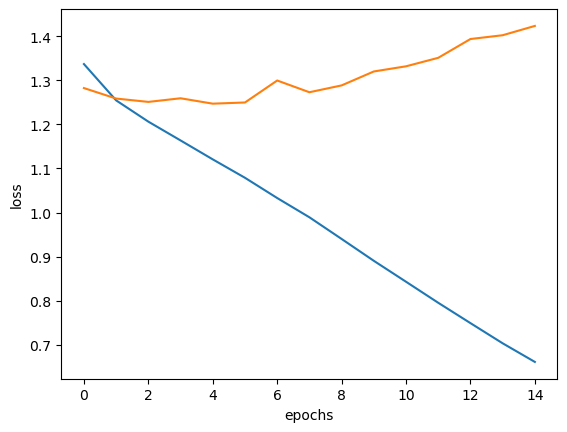

In [357]:
import matplotlib.pyplot as plt

num_epochs = 15

plt.figure()

###WRITE YOUR OWN CODE HERE

trained_model, train_losses, dev_losses = train_nn(num_epochs, ff_classifier_model, train_loader, dev_loader)
plt.plot(train_losses, label='train')
plt.plot(dev_losses, label='dev')


####

plt.xlabel('epochs')
plt.ylabel('loss')

In [389]:
def predict_nn(trained_model, test_loader):

    trained_model.eval()  # switch off some randomisation used during training (dropout) to give consistent predictions

    correct = 0  # count the number of correct classification labels

    gold_labs = []  # gold labels to return
    pred_labs = []  # predicted labels to return
    
    for inputs, labels in test_loader:
        test_output = trained_model(inputs)  # run the forward() function on the inputs
        predicted_labels = test_output.argmax(1)  # select the class labels with highest logits as our predictions

        gold_labs.extend(labels.tolist())
        pred_labs.extend(predicted_labels.tolist())
    
    return gold_labs, pred_labs

gold_labs, pred_labs = predict_nn(trained_model, test_loader)

In [359]:
from sklearn.metrics import classification_report 
print(classification_report(gold_labs, pred_labs))

              precision    recall  f1-score   support

           0       0.44      0.59      0.50       558
           1       0.34      0.29      0.31       358
           2       0.17      0.06      0.09       123
           3       0.32      0.27      0.29       382

    accuracy                           0.38      1421
   macro avg       0.32      0.30      0.30      1421
weighted avg       0.36      0.38      0.36      1421



In [278]:
import gensim.downloader

# download the word embeddings from Gensim
glove_wv = gensim.downloader.load('glove-twitter-25')

In [360]:
embedding_matrix = torch.zeros((vocab_size, glove_wv.vector_size))

glove_wv.vectors

count = 0

for word in glove_wv.index_to_key:
    if word in dictionary.token2id:
        word_idx = dictionary.token2id[word]
    
        embedding_matrix[word_idx, :] = torch.from_numpy(glove_wv[word])
        count +=1 
        
print(embedding_matrix)
print(count)

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [-0.4831, -0.4425, -0.5137,  ..., -0.4892, -0.4521, -1.3758],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]])
6170


## FFTextClassifierWithEmbeddings

In [361]:
class FFTextClassifierWithEmbeddings(FFTextClassifier):

    def __init__(self, hidden_size, sequence_length, num_classes, embedding_matrix):
        super(FFTextClassifier, self).__init__()

        self.embedding_size = embedding_matrix.shape[1] 

        # Here we just need to construct the components of our network. We don't need to connect them together yet.
        self.embedding_layer = nn.Embedding.from_pretrained(embedding_matrix, freeze=False) # embedding layer

        ### COMPLETE THE ARGUMENTS TO SPECIFY THE DIMENSIONS OF THE LAYERS
        self.hidden_layer = nn.Linear(self.embedding_size*sequence_length, hidden_size) # Hidden layer
        self.activation = nn.ReLU() # Hidden layer
        self.output_layer = nn.Linear(hidden_size, num_classes) # Full connection layer

In [362]:
### COMPLETE THE CODE BELOW
ff_emb_model = FFTextClassifierWithEmbeddings(hidden_size, sequence_length, num_classes, embedding_matrix)
trained_emb_model, _, _ = train_nn(8, ff_emb_model, train_loader, dev_loader)
gold_labs_emb, pred_labs_emb = predict_nn(trained_emb_model, test_loader)

Epoch: 1/8 Training Loss: 1.3132 Training Accuracy: 40.2211%
Epoch: 1/8 Validation Loss: 1.2923 Validation Accuracy: 42.2460%
Epoch: 2/8 Training Loss: 1.2549 Training Accuracy: 43.9054%
Epoch: 2/8 Validation Loss: 1.2716 Validation Accuracy: 42.5134%
Epoch: 3/8 Training Loss: 1.2218 Training Accuracy: 45.2871%
Epoch: 3/8 Validation Loss: 1.2586 Validation Accuracy: 42.7807%
Epoch: 4/8 Training Loss: 1.1855 Training Accuracy: 47.6205%
Epoch: 4/8 Validation Loss: 1.2509 Validation Accuracy: 43.3155%
Epoch: 5/8 Training Loss: 1.1437 Training Accuracy: 50.7522%
Epoch: 5/8 Validation Loss: 1.2398 Validation Accuracy: 41.7112%
Epoch: 6/8 Training Loss: 1.0933 Training Accuracy: 55.4191%
Epoch: 6/8 Validation Loss: 1.2449 Validation Accuracy: 43.0481%
Epoch: 7/8 Training Loss: 1.0380 Training Accuracy: 58.4280%
Epoch: 7/8 Validation Loss: 1.2396 Validation Accuracy: 40.9091%
Epoch: 8/8 Training Loss: 0.9783 Training Accuracy: 62.1431%
Epoch: 8/8 Validation Loss: 1.2461 Validation Accuracy: 4

In [363]:
from sklearn.metrics import f1_score

# Evaluate the models using F1 score
print(f'Random embedding intialisation: {f1_score(gold_labs, pred_labs, average="macro")}')
print(f'Frozen pretrained GloVe embeddings: {f1_score(gold_labs_emb, pred_labs_emb, average="macro")}')

# note that gold_labs_emb and gold_labs are different -- the dataset gets shuffled each time we iterate using the data loader. 

Random embedding intialisation: 0.29832968747310507
Frozen pretrained GloVe embeddings: 0.30391284029870136


## LSTMTextClassifierWithEmbeddings

In [364]:
class LSTMTextClassifierWithEmbeddings(FFTextClassifier):

    def __init__(self, hidden_size, sequence_length, num_classes, embedding_matrix):
        super(FFTextClassifier, self).__init__()

        self.embedding_size = embedding_matrix.shape[1] 

        # Here we just need to construct the components of our network. We don't need to connect them together yet.
        self.embedding_layer = nn.Embedding.from_pretrained(embedding_matrix, freeze=False)

        self.hidden_layer = nn.LSTM(self.embedding_size, hidden_size, bidirectional=True, batch_first=True)
        
        ### COMPLETE THE ARGUMENTS TO SPECIFY THE DIMENSIONS OF THE LAYERS
        self.activation = nn.ReLU() # Hidden layer
        self.output_layer = nn.Linear(2*hidden_size, num_classes) # Full connection layer

    def forward (self, input_words):
        # Input dimensions are:  (batch_size, seq_length)
        embedded_words = self.embedding_layer(input_words)  # (batch_size, seq_length, embedding_size)

        # flatten the sequence of embedding vectors for each document into a single vector.
        # embedded_words = embedded_words.reshape(embedded_words.shape[0], sequence_length*self.embedding_size)  # batch_size, seq_length*embedding_size
        _, (z, _) = self.hidden_layer(embedded_words)   # (2, batch_size, hidden_size)
        z = z.swapaxes(0, 1).flatten(1)
        
        ### ADD THE MISSING LINE HERE
        h = self.activation(z)                  # (batch_size, 2*hidden_size)
        ########
        
        output = self.output_layer(h)                      # (batch_size, num_classes)

        # Notice we haven't applied a softmax activation to the output layer -- it's not required by Pytorch's loss function.

        return output

# WRITE YOUR CODE HERE TO TEST THE LSTM CLASSIFIER
lstm_emb_model = LSTMTextClassifierWithEmbeddings(hidden_size, sequence_length, num_classes, embedding_matrix)
trained_emb_model, _, _ = train_nn(8, lstm_emb_model, train_loader, dev_loader)
gold_labs, pred_labs_lstm = predict_nn(trained_emb_model, test_loader)

Epoch: 1/8 Training Loss: 1.3182 Training Accuracy: 42.9843%
Epoch: 1/8 Validation Loss: 1.2982 Validation Accuracy: 42.7807%
Epoch: 2/8 Training Loss: 1.2726 Training Accuracy: 42.9843%
Epoch: 2/8 Validation Loss: 1.2623 Validation Accuracy: 42.7807%
Epoch: 3/8 Training Loss: 1.2438 Training Accuracy: 42.9843%
Epoch: 3/8 Validation Loss: 1.2467 Validation Accuracy: 42.7807%
Epoch: 4/8 Training Loss: 1.2239 Training Accuracy: 42.9843%
Epoch: 4/8 Validation Loss: 1.2356 Validation Accuracy: 42.7807%
Epoch: 5/8 Training Loss: 1.1923 Training Accuracy: 43.3528%
Epoch: 5/8 Validation Loss: 1.2141 Validation Accuracy: 42.5134%
Epoch: 6/8 Training Loss: 1.1406 Training Accuracy: 48.5723%
Epoch: 6/8 Validation Loss: 1.1846 Validation Accuracy: 44.9198%
Epoch: 7/8 Training Loss: 1.0822 Training Accuracy: 55.7568%
Epoch: 7/8 Validation Loss: 1.1738 Validation Accuracy: 46.7914%
Epoch: 8/8 Training Loss: 1.0147 Training Accuracy: 61.2527%
Epoch: 8/8 Validation Loss: 1.1695 Validation Accuracy: 4

In [367]:
from sklearn.metrics import f1_score
print(f'LSTM + Pretrained GloVe embeddings: {f1_score(gold_labs, pred_labs_lstm, average="macro")}')

LSTM + Pretrained GloVe embeddings: 0.34739613210943576


## Improve Neural Network by adding new layer

In [382]:
from torch import nn

class FFTextClassifier(nn.Module):
    
    def __init__(self, vocab_size, sequence_length, embedding_size, hidden_size1, hidden_size2, num_classes):
        super(FFTextClassifier, self).__init__()

        self.embedding_size = embedding_size

        # Embedding layer
        self.embedding_layer = nn.Embedding(vocab_size, embedding_size)
        
        # First hidden layer
        self.hidden_layer1 = nn.Linear(embedding_size * sequence_length, hidden_size1)
        
        # Second hidden layer with different size
        self.hidden_layer2 = nn.Linear(hidden_size1, hidden_size2)
        
        # Activation function
        self.activation = nn.ReLU()
        
        # Output layer
        self.output_layer = nn.Linear(hidden_size2, num_classes)

    def forward(self, input_words):
        # Input dimensions are: (batch_size, seq_length)
        embedded_words = self.embedding_layer(input_words)  # (batch_size, seq_length, embedding_size)

        # Flatten the sequence of embedding vectors for each document into a single vector.
        embedded_words = embedded_words.reshape(embedded_words.shape[0], -1)  # (batch_size, seq_length*embedding_size)

        # Pass through the first hidden layer and activation
        z1 = self.hidden_layer1(embedded_words)  # (batch_size, hidden_size1)
        h1 = self.activation(z1)                 # (batch_size, hidden_size1)
        
        # Pass through the second hidden layer and activation
        z2 = self.hidden_layer2(h1)              # (batch_size, hidden_size2)
        h2 = self.activation(z2)                 # (batch_size, hidden_size2)

        # Output layer
        output = self.output_layer(h2)           # (batch_size, num_classes)

        # No need to apply softmax here, as it's handled by the loss function
        return output


In [381]:
hidden_size1 = 64
hidden_size2 = 32

### COMPLETE THE CODE BELOW
twolayer_ff_model = FFTextClassifier(len(dictionary) + 1, sequence_length, glove_wv.vector_size, hidden_size1, hidden_size2, num_classes)
trained_2layer_model, _, _ = train_nn(8, twolayer_ff_model, train_loader, dev_loader)
gold_labs_imp, pred_labs_imp = predict_nn(trained_2layer_model, test_loader)

Epoch: 1/8 Training Loss: 1.3231 Training Accuracy: 38.7473%
Epoch: 1/8 Validation Loss: 1.2726 Validation Accuracy: 42.5134%
Epoch: 2/8 Training Loss: 1.2258 Training Accuracy: 44.0589%
Epoch: 2/8 Validation Loss: 1.2462 Validation Accuracy: 43.8503%
Epoch: 3/8 Training Loss: 1.1609 Training Accuracy: 47.6819%
Epoch: 3/8 Validation Loss: 1.2429 Validation Accuracy: 43.3155%
Epoch: 4/8 Training Loss: 1.0823 Training Accuracy: 52.4409%
Epoch: 4/8 Validation Loss: 1.2528 Validation Accuracy: 40.1070%
Epoch: 5/8 Training Loss: 0.9897 Training Accuracy: 59.4719%
Epoch: 5/8 Validation Loss: 1.2629 Validation Accuracy: 40.1070%
Epoch: 6/8 Training Loss: 0.8688 Training Accuracy: 66.6871%
Epoch: 6/8 Validation Loss: 1.3316 Validation Accuracy: 38.2353%
Epoch: 7/8 Training Loss: 0.7491 Training Accuracy: 72.5514%
Epoch: 7/8 Validation Loss: 1.3518 Validation Accuracy: 41.4439%
Epoch: 8/8 Training Loss: 0.6168 Training Accuracy: 79.3675%
Epoch: 8/8 Validation Loss: 1.4643 Validation Accuracy: 4

In [384]:
from sklearn.metrics import f1_score
print(f'Two layer random embedding: {f1_score(gold_labs_imp, pred_labs_imp, average="macro")}')

Two layer random embedding: 0.3153113825895208


## Two hidden layer with glove embedding

In [285]:
class ImprovedFFTextClassifier(nn.Module):
    def __init__(self, vocab_size, sequence_length, embedding_size, hidden_size1, hidden_size2, num_classes):
        super(ImprovedFFTextClassifier, self).__init__()
        self.embedding_size = embedding_matrix.shape[1] 
        self.sequence_length = sequence_length

        # Define layers
        self.embedding_layer = nn.Embedding(vocab_size, embedding_size)
        self.embedding_layer = nn.Embedding.from_pretrained(embedding_matrix, freeze=False) # embedding layer

        self.hidden_layer1 = nn.Linear(embedding_size * sequence_length, hidden_size1)
        self.hidden_layer2 = nn.Linear(hidden_size1, hidden_size2)
        self.activation = nn.ReLU()
        self.output_layer = nn.Linear(hidden_size2, num_classes)

    def forward(self, input_words):
        embedded_words = self.embedding_layer(input_words)  # (batch_size, seq_length, embedding_size)
        embedded_words = embedded_words.view(embedded_words.shape[0], -1)  # Flatten to (batch_size, seq_length * embedding_size)
        z1 = self.hidden_layer1(embedded_words)  # (batch_size, hidden_size1)
        h1 = self.activation(z1)  # Apply activation
        z2 = self.hidden_layer2(h1)  # (batch_size, hidden_size2)
        h2 = self.activation(z2)  # Apply activation
        output = self.output_layer(h2)  # (batch_size, num_classes)
        return output

In [368]:
hidden_size1 = 64
hidden_size2 = 32

### COMPLETE THE CODE BELOW
improved_ff_model = ImprovedFFTextClassifier(len(dictionary) + 1, sequence_length, glove_wv.vector_size, hidden_size1, hidden_size2, num_classes)
trained_imp_model, _, _ = train_nn(8, improved_ff_model, train_loader, dev_loader)
gold_labs_imp, pred_labs_imp = predict_nn(trained_imp_model, test_loader)

Epoch: 1/8 Training Loss: 1.2623 Training Accuracy: 42.1247%
Epoch: 1/8 Validation Loss: 1.2364 Validation Accuracy: 42.7807%
Epoch: 2/8 Training Loss: 1.1563 Training Accuracy: 45.4406%
Epoch: 2/8 Validation Loss: 1.1817 Validation Accuracy: 45.1872%
Epoch: 3/8 Training Loss: 0.9665 Training Accuracy: 62.1738%
Epoch: 3/8 Validation Loss: 1.1814 Validation Accuracy: 47.8610%
Epoch: 4/8 Training Loss: 0.7747 Training Accuracy: 71.9374%
Epoch: 4/8 Validation Loss: 1.2450 Validation Accuracy: 46.5241%
Epoch: 5/8 Training Loss: 0.6445 Training Accuracy: 76.8499%
Epoch: 5/8 Validation Loss: 1.2763 Validation Accuracy: 46.7914%
Epoch: 6/8 Training Loss: 0.5496 Training Accuracy: 80.6877%
Epoch: 6/8 Validation Loss: 1.3402 Validation Accuracy: 49.1979%
Epoch: 7/8 Training Loss: 0.4787 Training Accuracy: 82.9291%
Epoch: 7/8 Validation Loss: 1.4154 Validation Accuracy: 46.7914%
Epoch: 8/8 Training Loss: 0.4030 Training Accuracy: 86.1222%
Epoch: 8/8 Validation Loss: 1.5100 Validation Accuracy: 4

In [369]:
from sklearn.metrics import f1_score
print(f'Two layer Pretrained GloVe embeddings: {f1_score(gold_labs_imp, pred_labs_imp, average="macro")}')

Two layer Pretrained GloVe embeddings: 0.4096083761832926


In [370]:
import torch
import torch.nn as nn

class ImprovedFFTextClassifierWithLSTM(nn.Module):
    def __init__(self, vocab_size, sequence_length, embedding_size, hidden_size1, hidden_size2, num_classes, embedding_matrix):
        super(ImprovedFFTextClassifierWithLSTM, self).__init__()
        self.embedding_size = embedding_matrix.shape[1] 
        self.sequence_length = sequence_length

        # Define layers
        self.embedding_layer = nn.Embedding.from_pretrained(embedding_matrix, freeze=False) # embedding layer

        self.lstm_layer = nn.LSTM(embedding_size, hidden_size1, batch_first=True, bidirectional=True)
        
        self.hidden_layer = nn.Linear(hidden_size1 * 2, hidden_size2)
        self.activation = nn.ReLU()
        self.output_layer = nn.Linear(hidden_size2, num_classes)

    def forward(self, input_words):
        embedded_words = self.embedding_layer(input_words)  # (batch_size, seq_length, embedding_size)
        
        lstm_out, (hn, cn) = self.lstm_layer(embedded_words)  # (batch_size, seq_length, 2*hidden_size1)
        lstm_out = lstm_out[:, -1, :]  # Take the last output of the sequence (batch_size, 2*hidden_size1)
        
        z = self.hidden_layer(lstm_out)  # (batch_size, hidden_size2)
        h = self.activation(z)  # Apply activation
        output = self.output_layer(h)  # (batch_size, num_classes)
        return output


## ImprovedFFTextClassifierWithLSTM

In [371]:
hidden_size1 = 64
hidden_size2 = 32

### COMPLETE THE CODE BELOW
improved_ff_model_2 = ImprovedFFTextClassifierWithLSTM(vocab_size, sequence_length, embedding_size, hidden_size1, hidden_size2, num_classes, embedding_matrix)
trained_imp_model_2, _, _ = train_nn(8, improved_ff_model_2, train_loader, dev_loader)
gold_labs_imp_2, pred_labs_imp_2 = predict_nn(trained_imp_model, test_loader)

Epoch: 1/8 Training Loss: 1.3220 Training Accuracy: 35.9840%
Epoch: 1/8 Validation Loss: 1.2424 Validation Accuracy: 42.7807%
Epoch: 2/8 Training Loss: 1.1306 Training Accuracy: 50.6908%
Epoch: 2/8 Validation Loss: 1.1518 Validation Accuracy: 52.1390%
Epoch: 3/8 Training Loss: 0.9007 Training Accuracy: 68.0381%
Epoch: 3/8 Validation Loss: 1.1486 Validation Accuracy: 47.8610%
Epoch: 4/8 Training Loss: 0.7736 Training Accuracy: 71.5689%
Epoch: 4/8 Validation Loss: 1.1756 Validation Accuracy: 48.9305%
Epoch: 5/8 Training Loss: 0.6846 Training Accuracy: 74.6699%
Epoch: 5/8 Validation Loss: 1.1911 Validation Accuracy: 51.3369%
Epoch: 6/8 Training Loss: 0.6215 Training Accuracy: 76.1437%
Epoch: 6/8 Validation Loss: 1.1891 Validation Accuracy: 54.8128%
Epoch: 7/8 Training Loss: 0.5681 Training Accuracy: 79.0298%
Epoch: 7/8 Validation Loss: 1.2082 Validation Accuracy: 55.0802%
Epoch: 8/8 Training Loss: 0.5143 Training Accuracy: 80.2579%
Epoch: 8/8 Validation Loss: 1.2392 Validation Accuracy: 5

In [372]:
from sklearn.metrics import f1_score
print(f'Two layer Pretrained GloVe embeddings + LSTM: {f1_score(gold_labs_imp_2, pred_labs_imp_2, average="macro")}')

Two layer Pretrained GloVe embeddings + LSTM: 0.4229823815982075


In [373]:
import numpy as np


# Convert list to NumPy array
pred_labs_imp_2_array = np.array(pred_labs_imp_2)

gold_labs_imp_2_array = np.array(gold_labs_imp_2)

In [374]:
label_mapping = {
    0: "anger",
    1: "joy",
    2: "optimism",
    3: "sadness"
}

In [388]:
error_indexes = pred_labs_imp_2_array != gold_labs_imp_2_array  # compare predictions to gold labels

# get the text of reviews where the classifier made an error:
reviews_err = np.array(test_texts)[error_indexes]

# WRITE YOUR CODE HERE
pred_err = pred_labs_imp_2_array[error_indexes]
gold_err = gold_labs_imp_2_array[error_indexes]

for i in range(20):  # just print the first ten
    print(f'Review: {reviews_err[i]}; true label = {gold_err[i]}, prediction = {pred_err[i]}.')

Review: #Deppression is real. Partners w/ #depressed people truly dont understand the depth in which they affect us. Add in #anxiety &amp;makes it worse; true label = 0, prediction = 3.
Review: My visit to hospital for care triggered #trauma from accident 20+yrs ago and image of my dead brother in it. Feeling symptoms of #depression; true label = 1, prediction = 3.
Review: What makes you feel #joyful?; true label = 2, prediction = 3.
Review: i am revolting.; true label = 1, prediction = 0.
Review: Rin might ever appeared gloomy but to be a melodramatic person was not her thing.\n\nBut honestly, she missed her old friend. The special one.; true label = 0, prediction = 3.
Review: @user @user #cmbyn does screen  August 4 &amp; 6 at #miff; true label = 0, prediction = 3.
Review: @user how can u have sold so many copies but ur game has so many fucking bugs and mad lag issues. Optimize ur shit soon.; true label = 2, prediction = 1.
Review: Pressured. 😦; true label = 0, prediction = 3.
Review

# Topic Modeling

In [20]:
# Filter texts with 'joy' label from each dataset
joy_train_texts = [text for text, label in zip(train_texts, train_labels) if label == 'joy']
joy_val_texts = [text for text, label in zip(val_texts, val_labels) if label == 'joy']
joy_test_texts = [text for text, label in zip(test_texts, test_labels) if label == 'joy']


optimistic_train_texts = [text for text, label in zip(train_texts, train_labels) if label == 'optimistic']
optimistic_val_texts = [text for text, label in zip(val_texts, val_labels) if label == 'optimistic']
optimistic_test_texts = [text for text, label in zip(test_texts, test_labels) if label == 'optimistic']

# Combine the lists into one

In [22]:
joy_text = joy_train_texts +joy_val_texts+joy_test_texts

optimistic_text = optimistic_train_texts + optimistic_val_texts+optimistic_test_texts

In [38]:
text_joy_optimistic = joy_text+optimistic_text

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer 
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS # find stopwords
import numpy as np
import re



np.random.seed(400)  # We fix the random seed to ensure we get consistent results when we repeat the lab.

def preprocess(text):
    # Remove user mentions using regular expression
    text = re.sub(r'@\w+', '', text)
    
    result = []
    for token in simple_preprocess(text):  # Tokenize, remove very short and very long words, convert to lower case, remove words containing non-letter characters
        if token not in STOPWORDS:
            result.append(WordNetLemmatizer().lemmatize(token, 'v'))
            
    return result


# Create a list of preprocessed documents
processed = []
for doc in text_joy_optimistic:
    processed.append(preprocess(doc))

In [41]:
processed[1]

['tiller', 'breezy', 'collab', 'album', 'rap', 'sing', 'prolly']

In [42]:
from gensim.corpora import Dictionary

dictionary = Dictionary(processed) # construct word<->id mappings - it does it in alphabetical order
print(dictionary)

bow_corpus = [dictionary.doc2bow(doc) for doc in processed]

Dictionary<3575 unique tokens: ['atsu', 'cherry', 'cute', 'help', 'photos']...>


In [43]:
from gensim.models import LdaModel

# This call will construct and fit (train) the LDA model:
lda_model =  LdaModel(bow_corpus, 
                      num_topics=10, 
                      id2word=dictionary,                                    
                      passes=10,
                    ) 

In [44]:
'''
For each topic, we will explore the words occuring in that topic and its relative weight
'''
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.016*"like" + 0.012*"hilarious" + 0.009*"amp" + 0.009*"love" + 0.008*"think" + 0.008*"look" + 0.007*"hilarity" + 0.006*"great" + 0.006*"ve" + 0.006*"time"


Topic: 1 
Words: 0.010*"glee" + 0.010*"laugh" + 0.010*"awesome" + 0.009*"watch" + 0.009*"thank" + 0.007*"get" + 0.006*"love" + 0.006*"need" + 0.005*"people" + 0.005*"horror"


Topic: 2 
Words: 0.013*"watch" + 0.012*"get" + 0.010*"want" + 0.009*"laugh" + 0.008*"hilarious" + 0.007*"love" + 0.007*"ve" + 0.006*"im" + 0.005*"today" + 0.005*"nd"


Topic: 3 
Words: 0.019*"look" + 0.008*"ha" + 0.007*"like" + 0.006*"amaze" + 0.006*"follow" + 0.006*"wow" + 0.006*"great" + 0.006*"feel" + 0.006*"hilarious" + 0.006*"oh"


Topic: 4 
Words: 0.013*"good" + 0.010*"shake" + 0.009*"know" + 0.009*"cheer" + 0.009*"hilarious" + 0.008*"ll" + 0.008*"thank" + 0.007*"let" + 0.005*"come" + 0.004*"say"


Topic: 5 
Words: 0.015*"love" + 0.011*"amp" + 0.009*"blue" + 0.007*"happy" + 0.007*"birthday" + 0.005*"like" + 0.005*"th" + 0.005*"big" + 0

In [45]:
#hyper tunning

from gensim.models.coherencemodel import CoherenceModel
def calculate_coherence_score(n, alpha, beta):
    lda_model = LdaModel(corpus=bow_corpus,
                       id2word=dictionary,
                       num_topics=n, 
                       random_state=100,
                       update_every=1,
                       chunksize=100,
                       passes=10,
                       alpha=alpha,
                       per_word_topics=True,
                       eta = beta)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=processed, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    return coherence_lda

#list containing various hyperparameters
no_of_topics = [2,5,7,10,12,14]
alpha_list = ['symmetric',0.3,0.5,0.7]
beta_list = ['auto',0.3,0.5,0.7]


for n in no_of_topics:
    for alpha in alpha_list:
        for beta in beta_list:
            coherence_score = calculate_coherence_score(n, alpha, beta)
            print(f"n : {n} ; alpha : {alpha} ; beta : {beta} ; Score : {coherence_score}")

n : 2 ; alpha : symmetric ; beta : auto ; Score : 0.38290168473733754
n : 2 ; alpha : symmetric ; beta : 0.3 ; Score : 0.4168762173369497
n : 2 ; alpha : symmetric ; beta : 0.5 ; Score : 0.38290168473733754
n : 2 ; alpha : symmetric ; beta : 0.7 ; Score : 0.4001786044988851
n : 2 ; alpha : 0.3 ; beta : auto ; Score : 0.43755416340566705
n : 2 ; alpha : 0.3 ; beta : 0.3 ; Score : 0.45218582944085717
n : 2 ; alpha : 0.3 ; beta : 0.5 ; Score : 0.43755416340566705
n : 2 ; alpha : 0.3 ; beta : 0.7 ; Score : 0.43908674498474853
n : 2 ; alpha : 0.5 ; beta : auto ; Score : 0.38290168473733754
n : 2 ; alpha : 0.5 ; beta : 0.3 ; Score : 0.4168762173369497
n : 2 ; alpha : 0.5 ; beta : 0.5 ; Score : 0.38290168473733754
n : 2 ; alpha : 0.5 ; beta : 0.7 ; Score : 0.4001786044988851
n : 2 ; alpha : 0.7 ; beta : auto ; Score : 0.4155500936480837
n : 2 ; alpha : 0.7 ; beta : 0.3 ; Score : 0.45727142985175495
n : 2 ; alpha : 0.7 ; beta : 0.5 ; Score : 0.4155500936480837
n : 2 ; alpha : 0.7 ; beta : 0.7 

In [46]:
lda_model = LdaModel(corpus=bow_corpus,
                       id2word=dictionary,
                       num_topics=12, 
                       random_state=100,
                       update_every=1,
                       chunksize=100,
                       passes=10,
                       alpha=0.3,
                       per_word_topics=True,
                       eta = 'auto')
    
#n : 10 ; alpha : 0.3 ; beta : auto ; Score : 0.6151341218852091


In [47]:
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.101*"love" + 0.062*"amp" + 0.053*"look" + 0.023*"blue" + 0.022*"delicious" + 0.018*"eclipse" + 0.016*"delight" + 0.014*"kid" + 0.013*"dark" + 0.011*"absolutely"


Topic: 1 
Words: 0.034*"today" + 0.026*"beautiful" + 0.021*"time" + 0.017*"help" + 0.016*"cute" + 0.015*"read" + 0.014*"long" + 0.014*"joy" + 0.013*"team" + 0.013*"say"


Topic: 2 
Words: 0.108*"amaze" + 0.089*"watch" + 0.043*"excite" + 0.035*"hope" + 0.024*"ly" + 0.022*"live" + 0.018*"broadcast" + 0.018*"musically" + 0.015*"terrific" + 0.013*"movie"


Topic: 3 
Words: 0.040*"great" + 0.040*"snap" + 0.039*"good" + 0.026*"new" + 0.024*"wow" + 0.017*"snapchat" + 0.015*"horny" + 0.015*"meet" + 0.013*"game" + 0.013*"use"


Topic: 4 
Words: 0.045*"best" + 0.031*"fun" + 0.027*"laughter" + 0.021*"thing" + 0.020*"ll" + 0.019*"horror" + 0.018*"twitter" + 0.017*"hard" + 0.017*"try" + 0.016*"moment"


Topic: 5 
Words: 0.054*"laugh" + 0.045*"get" + 0.036*"thank" + 0.035*"go" + 0.034*"want" + 0.020*"work" + 0.020*"shake

# Task 2: Named Entity Recognition 

# Bio Creative V

Marks chemicals and diseases in Pubmed articles as named entities. For further details, see [the HuggingFace page](https://huggingface.co/datasets/tner/bc5cdr)

In [3]:
ner_dataset = load_dataset(
    "tner/bc5cdr", 
)

print(f'The dataset is a dictionary with {len(ner_dataset)} splits: \n\n{ner_dataset}')

The dataset is a dictionary with 3 splits: 

DatasetDict({
    train: Dataset({
        features: ['tokens', 'tags'],
        num_rows: 5228
    })
    validation: Dataset({
        features: ['tokens', 'tags'],
        num_rows: 5330
    })
    test: Dataset({
        features: ['tokens', 'tags'],
        num_rows: 5865
    })
})


In [11]:
# It  may be useful to obtain the data in a list format for some sequence tagging methods
train_sentences_ner = [item['tokens'] for item in ner_dataset['train']]
train_labels_ner = [[str(tag) for tag in item['tags']] for item in ner_dataset['train']]

val_sentences_ner = [item['tokens'] for item in ner_dataset['validation']]
val_labels_ner = [[str(tag) for tag in item['tags']] for item in ner_dataset['validation']]

test_sentences_ner = [item['tokens'] for item in ner_dataset['test']]
test_labels_ner = [[str(tag) for tag in item['tags']] for item in ner_dataset['test']]

In [12]:
# Show the different tag values in the dataset:
np.unique(np.concatenate(train_labels_ner))

array(['0', '1', '2', '3', '4'], dtype='<U1')

# Named Entity Recognition with CRF

In [13]:
ner_tag_mapping = {0:"O", 1:"B-Chemical", 2:"B-Disease", 3:"I-Disease", 4:"I-Chemical"}

In [14]:
# train_set = [list(zip(sentence, [ner_tag_mapping[tag] for tag in tags])) for sentence, tags in zip(train_sentences_ner, train_labels_ner)]
train_set = [list(zip(sentence, [ner_tag_mapping[int(tag)] for tag in tags])) for sentence, tags in zip(train_sentences_ner, train_labels_ner)]
test_set = [list(zip(sentence, [ner_tag_mapping[int(tag)] for tag in tags])) for sentence, tags in zip(test_sentences_ner, test_labels_ner)]


test_tags = [[ner_tag_mapping[int(tag)] for tag in tags] for tags in test_labels_ner][:-1]

# train_set = [list(zip(s['tokens'], [ner_tag_mapping[tok] for tok in s['ner_tags']])) for s in train_dataset][:-1]


In [16]:
import nltk

# Train a CRF NER tagger
def train_CRF_NER_tagger(train_set):
    tagger = nltk.tag.CRFTagger()
    tagger.train(train_set, 'model.crf.tagger')
    return tagger  # return the trained model

tagger = train_CRF_NER_tagger(train_set)

In [17]:
predicted_tags = tagger.tag_sents(test_sentences_ner)

In [27]:
train_sentences_ner[4]

['Naloxone',
 'alone',
 'did',
 'not',
 'affect',
 'either',
 'blood',
 'pressure',
 'or',
 'heart',
 'rate',
 '.']

In [18]:
train_set[4]

[('Naloxone', 'B-Chemical'),
 ('alone', 'O'),
 ('did', 'O'),
 ('not', 'O'),
 ('affect', 'O'),
 ('either', 'O'),
 ('blood', 'O'),
 ('pressure', 'O'),
 ('or', 'O'),
 ('heart', 'O'),
 ('rate', 'O'),
 ('.', 'O')]

In [19]:
def extract_spans(tagged_sents):
    """
    Extract a list of tagged spans for each named entity type, 
    where each span is represented by a tuple containing the 
    start token and end token indexes.
    
    returns: a dictionary containing a list of spans for each entity type.
    """
    spans = {}
        
    for sidx, sent in enumerate(tagged_sents):
        start = -1
        entity_type = None
        for i, (tok, lab) in enumerate(sent):
            if 'B-' in lab:
                start = i
                end = i + 1
                entity_type = lab[2:]
            elif 'I-' in lab:
                end = i + 1
            elif lab == 'O' and start >= 0:
                
                if entity_type not in spans:
                    spans[entity_type] = []
                
                spans[entity_type].append((start, end, sidx))
                start = -1      
        # Sometimes an I-token is the last token in the sentence, so we still have to add the span to the list
        if start >= 0:    
            if entity_type not in spans:
                spans[entity_type] = []
                
            spans[entity_type].append((start, end, sidx))
                
    return spans


def cal_span_level_f1(test_sents, test_sents_with_pred):
    # get a list of spans from the test set labels
    gold_spans = extract_spans(test_sents)

    # get a list of spans predicted by our tagger
    pred_spans = extract_spans(test_sents_with_pred)
    
    # compute the metrics for each class:
    f1_per_class = []
    
    ne_types = gold_spans.keys()  # get the list of named entity types (not the tags)
    
    for ne_type in ne_types:
        # compute the confusion matrix
        true_pos = 0
        false_pos = 0
        
        for span in pred_spans[ne_type]:
            if span in gold_spans[ne_type]:
                true_pos += 1
            else:
                false_pos += 1
                
        false_neg = 0
        for span in gold_spans[ne_type]:
            if span not in pred_spans[ne_type]:
                false_neg += 1
                
        if true_pos + false_pos == 0:
            precision = 0
        else:
            precision = true_pos / float(true_pos + false_pos)
            
        if true_pos + false_neg == 0:
            recall = 0
        else:
            recall = true_pos / float(true_pos + false_neg)
        
        if precision + recall == 0:
            f1 = 0
        else:
            f1 = 2 * precision * recall / (precision + recall)
            
        f1_per_class.append(f1)
        print(f'F1 score for class {ne_type} = {f1}')
        
    print(f'Macro-average f1 score = {np.mean(f1_per_class)}')

cal_span_level_f1(test_set, predicted_tags)

F1 score for class Chemical = 0.815137987012987
F1 score for class Disease = 0.6493745885450954
Macro-average f1 score = 0.7322562877790413


In [20]:
import re, unicodedata

class CustomCRFTagger(nltk.tag.CRFTagger):
    _current_tokens = None
    
    def _get_features(self, tokens, idx):
            """
            Extract basic features about this word including
                - Current word
                - is it capitalized?
                - Does it have punctuation?
                - Does it have a number?
                - Suffixes up to length 3

            Note that : we might include feature over previous word, next word etc.

            :return: a list which contains the features
            :rtype: list(str)
            """
            token = tokens[idx]

            feature_list = []

            if not token:
                return feature_list

            # Capitalization
            if token[0].isupper():
                feature_list.append("CAPITALIZATION")

            # Number
            if re.search(self._pattern, token) is not None:
                feature_list.append("HAS_NUM")

            # Punctuation
            punc_cat = {"Pc", "Pd", "Ps", "Pe", "Pi", "Pf", "Po"}
            if all(unicodedata.category(x) in punc_cat for x in token):
                feature_list.append("PUNCTUATION")

            # Suffix up to length 3
            if len(token) > 1:
                feature_list.append("SUF_" + token[-1:])
            if len(token) > 2:
                feature_list.append("SUF_" + token[-2:])
            if len(token) > 3:
                feature_list.append("SUF_" + token[-3:])

                
            # Current word
            feature_list.append("WORD_" + token)
            
            ### WRITE YOUR OWN CODE HERE ###
            if idx > 0:
                feature_list.append("PREVWORD_" + tokens[idx-1])
            if idx < len(tokens)-1:
                feature_list.append("NEXTWORD_" + tokens[idx+1])
                
            ####

            return feature_list
                

In [21]:
# Train a CRF NER tagger
def train_CustomCRF_NER_tagger(train_set):
    ### WRITE YOUR OWN CODE HERE
    tagger = CustomCRFTagger()
    tagger.train(train_set, 'model.crf.tagger')
    return tagger  # return the trained model

tagger = train_CustomCRF_NER_tagger(train_set)

In [22]:
predicted_tags = tagger.tag_sents(test_sentences_ner)
cal_span_level_f1(test_set, predicted_tags)

F1 score for class Chemical = 0.8207834381976863
F1 score for class Disease = 0.6922183507549361
Macro-average f1 score = 0.7565008944763112


## Adding POS tag to feature

In [23]:
# Download the package for PoS tagging
nltk.download('averaged_perceptron_tagger')

# Some arbitrary token sequence to see how it works...
example_sentence = ["PoS", "tags", "often", "provide", "useful", "information", "for", "identifying", "entities"]

# Tag the sentence...
pos_tagged_tokens = nltk.pos_tag(example_sentence)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/dangngocbach/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [73]:
pos_tagged_tokens

[('PoS', 'NNP'),
 ('tags', 'NNS'),
 ('often', 'RB'),
 ('provide', 'VBP'),
 ('useful', 'JJ'),
 ('information', 'NN'),
 ('for', 'IN'),
 ('identifying', 'VBG'),
 ('entities', 'NNS')]

In [24]:
# *** Improve the CRF NER tagger using parts of speech (see lab 5) as additional features.
class CRFTaggerWithPOS(CustomCRFTagger):
    _current_tokens = None
    
    def _get_features(self, tokens, index):
        """
        Extract the features for a token and append the POS tag as an additional feature.
        """
        basic_features = super()._get_features(tokens, index)
        
        # Get the pos tags for the current sentence and save it
        if tokens != self._current_tokens:
            self._pos_tagged_tokens = nltk.pos_tag(tokens)
            self._current_tokens = tokens
            
            
        ### WRITE YOUR OWN CODE HERE
        basic_features.append(self._pos_tagged_tokens[index][1])
        ###
        
        return basic_features

In [32]:
# Train a CRF NER tagger
def train_CRF_NER_tagger_with_POS(train_set):
    ### WRITE YOUR OWN CODE HERE
    tagger = CRFTaggerWithPOS()
    tagger.train(train_set, 'model.crf.tagger')
    return tagger  # return the trained model

tagger = train_CRF_NER_tagger_with_POS(train_set)

In [33]:
predicted_tags = tagger.tag_sents(test_sentences_ner)
cal_span_level_f1(test_set, predicted_tags)

F1 score for class Chemical = 0.8255919395465995
F1 score for class Disease = 0.688230008984726
Macro-average f1 score = 0.7569109742656628


In [34]:
import numpy as np
import nltk
from nltk.tag import CRFTagger

predicted_tags = tagger.tag_sents(test_sentences_ner)

# Convert predicted tags and true tags to flat lists for comparison
flat_pred_tags = [tag for sent in predicted_tags for _, tag in sent]
flat_true_tags = [ner_tag_mapping[int(tag)] for tags in test_labels_ner for tag in tags]

# Identify misclassified indexes
error_indexes = np.array(flat_pred_tags) != np.array(flat_true_tags)

# Extract sentences, true tags, and predicted tags for misclassified instances
misclassified_sentences = []
misclassified_true_tags = []
misclassified_pred_tags = []

# Track the index in the flattened list
flat_idx = 0

for sentence, true_tags, pred_tags in zip(test_sentences_ner, test_labels_ner, predicted_tags):
    sentence_len = len(sentence)
    sentence_error = False
    for i in range(sentence_len):
        if error_indexes[flat_idx + i]:
            sentence_error = True
    if sentence_error:
        misclassified_sentences.append(sentence)
        misclassified_true_tags.append([ner_tag_mapping[int(tag)] for tag in true_tags])
        misclassified_pred_tags.append([tag for _, tag in pred_tags])
    flat_idx += sentence_len

# Display the first 20 misclassified examples
for i in range(min(20, len(misclassified_sentences))):
    print(f'Sentence: {" ".join(misclassified_sentences[i])}')
    print(f'True tags: {misclassified_true_tags[i]}')
    print(f'Predicted tags: {misclassified_pred_tags[i]}')
    print('---')


Sentence: Famotidine is a histamine H2 - receptor antagonist used in inpatient settings for prevention of stress ulcers and is showing increasing popularity because of its low cost .
True tags: ['B-Chemical', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-Disease', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
Predicted tags: ['B-Chemical', 'O', 'O', 'B-Chemical', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
---
Sentence: After a single oral dose of 4 mg / kg indomethacin ( IDM ) to sodium and volume depleted rats plasma renin activity ( PRA ) and systolic blood pressure fell significantly within four hours .
True tags: ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-Chemical', 'O', 'B-Chemical', 'O', 'O', 'B-Chemical', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
Predicted tags: ['O', 'O', 'O', 'O', 'O', 'O', 'O

# Find similarity top5 and bottom5 of a query

## 1. Word Embedding using word2vec

In [85]:
def extract_all_diseases(test_set):
    disease_entities = []
    for sentence in test_set:
        current_entity = []
        for token, tag in sentence:
            if tag == 'B-Disease':
                if current_entity:  # If there's already a disease entity, save it
                    disease_entities.append(' '.join(current_entity))
                current_entity = [token]  # Start a new disease entity
            elif tag == 'I-Disease' and current_entity:
                current_entity.append(token)  # Continue the disease entity
            else:
                if current_entity:  # If there was a disease entity, save it
                    disease_entities.append(' '.join(current_entity))
                current_entity = []  # Reset for next potential entity
        if current_entity:  # Add any remaining entity at the end of the sentence
            disease_entities.append(' '.join(current_entity))
    return disease_entities


# Use the function to get all disease entities from the test set
disease_entities = extract_all_diseases(test_set)


In [135]:
##Similarity

from gensim.models import word2vec
from gensim.utils import tokenize

emb_model = word2vec.Word2Vec(test_sentences_ner, sg=1, min_count=1, window=3, vector_size=100, epochs=30)


In [136]:
emb_model.wv['migraines']

array([-0.312716  ,  0.04542065, -0.02092936, -0.08925087,  0.01365494,
        0.06018087,  0.1555196 ,  0.07812367, -0.48636788, -0.18968345,
       -0.14114791, -0.30868667,  0.0209999 ,  0.12710884,  0.25106195,
       -0.10148634,  0.0544029 , -0.05448128, -0.09227941, -0.20394005,
        0.27144694,  0.16110562,  0.34318063, -0.1383569 ,  0.12531379,
        0.15428202, -0.03332406, -0.17248991, -0.23095   ,  0.1183819 ,
        0.30243316, -0.04523508,  0.03777337, -0.2618558 ,  0.01162463,
        0.06375823, -0.0153933 ,  0.00823484,  0.03791991, -0.2035484 ,
       -0.07207155, -0.22247878, -0.07345229, -0.04688302,  0.1254842 ,
        0.10776123, -0.00911068,  0.10012401, -0.05780936, -0.06223692,
        0.43635696,  0.06757057, -0.05826481, -0.06820453, -0.09701441,
        0.0602355 ,  0.14931507,  0.05237325,  0.04074718, -0.04173224,
        0.01931452,  0.15890487, -0.00261541,  0.2204366 , -0.34486297,
        0.09957571,  0.04965109,  0.22131118, -0.10788109,  0.36

In [137]:
# Assume emb_model is trained on full sentences
query_disease = 'depression'

# Suppose 'diseases' is your set of disease entities
all_similar = emb_model.wv.most_similar(query_disease, topn=200)  # Get a broader range of similar words



similar_diseases = [item for item in all_similar if item[0] in disease_entities][:5]  # Filter for diseases

print("Most similar diseases:")
for disease, similarity in similar_diseases:
    print(f"{disease} (similarity: {similarity})")


Most similar diseases:
impulsiveness (similarity: 0.6691165566444397)
thromboembolism (similarity: 0.6322165727615356)
agoraphobia (similarity: 0.6304432153701782)
hematuria (similarity: 0.6226135492324829)
aggressiveness (similarity: 0.6197142004966736)


### retrieve bottom 5

In [141]:
vocab = emb_model.wv.key_to_index.keys()
# Assuming emb_model is trained on full sentences
query_disease = 'depression'

# Suppose 'disease_entities' is your set of disease entities
vocab = emb_model.wv.key_to_index.keys()  # Get all words in the vocabulary

# Calculate similarity for all words in the vocabulary
all_similarities = [(word, emb_model.wv.similarity(query_disease, word)) for word in vocab if word in disease_entities]

# Sort the similarities in ascending order
all_similarities.sort(key=lambda x: x[1])

# Get the bottom 5 most similar diseases
bottom_similar_diseases = all_similarities[:5]

print("Bottom 5 similar diseases:")
for disease, similarity in bottom_similar_diseases:
    print(f"{disease} (similarity: {similarity})")


Bottom 5 similar diseases:
VT (similarity: 0.15398073196411133)
RRMM (similarity: 0.1658707857131958)
thrush (similarity: 0.16753792762756348)
nephropathy (similarity: 0.18486620485782623)
amnesia (similarity: 0.20589977502822876)


In [127]:
# count=0
# top5=[]
# for item in all_similar:
#     if item[0] in disease_entities:
#         count+=1
#         top5.append(item)
#         if count==5:
#             break
# top5

## 2. Term-document vector representation

In [37]:
document_set=test_set

In [ ]:
# filter out the disease with tag B-disease, 

In [134]:
filtered_corpus = []

for sentence in document_set:
    current_disease = []
    diseases_in_sentence = []

    for word, tag in sentence:
        if tag == 'B-Disease':
            if current_disease:
                # Add the completed disease name to the list and start a new one
                diseases_in_sentence.append(' '.join(current_disease))
                current_disease = [word]
            else:
                # Start a new disease name
                current_disease = [word]
        elif tag == 'I-Disease' and current_disease:
            # Continue building the current disease name
            current_disease.append(word)
        else:
            if current_disease:
                # Add the completed disease name to the list and reset for potentially new disease
                diseases_in_sentence.append(' '.join(current_disease))
                current_disease = []

    # Check if there's an unfinished disease name at the end of the sentence
    if current_disease:
        diseases_in_sentence.append(' '.join(current_disease))

    # Join all disease names in the sentence into a single string separated by commas
    filtered_corpus.append(', '.join(diseases_in_sentence))

filtered_corpus[1:20]

['',
 'ulcers',
 'delirium',
 'delirium',
 '',
 '',
 'hypotension',
 '',
 '',
 '',
 'scleroderma renal crisis',
 'Scleroderma renal crisis, SRC, systemic sclerosis, SSc',
 'SRC',
 'thrombotic microangiopathy, SSc',
 'SRC',
 'SSc',
 'psychosis',
 'psychosis',
 'psychosis']

In [45]:
filtered_corpus = [item for item in filtered_corpus if item != '']
filtered_corpus[1:20]

['ulcers',
 'hypotension',
 'scleroderma renal crisis',
 'Scleroderma renal crisis, SRC, systemic sclerosis, SSc',
 'SRC',
 'thrombotic microangiopathy, SSc',
 'SSc',
 'psychosis',
 'psychosis, psychiatric disorders',
 'psychotic symptoms',
 'depressive disorder',
 'bipolar disorder',
 'antisocial personality disorder',
 'Major depressive disorder',
 'affective disorder, antisocial personality',
 "Parkinson's disease, dyskinetic",
 "Parkinson's disease, PD, dyskinesias, LIDs",
 'LIDs',
 'abnormal involuntary movements']

In [46]:
# Set to keep track of seen items
seen = set()
# List to keep only unique items, preserving the order
unique_list = []

for item in filtered_corpus:
    if item not in seen:
        unique_list.append(item)
        seen.add(item)
        
        
filtered_corpus = unique_list
print("Unique List:", unique_list)

Unique List: ['delirium', 'ulcers', 'hypotension', 'scleroderma renal crisis', 'Scleroderma renal crisis, SRC, systemic sclerosis, SSc', 'SRC', 'thrombotic microangiopathy, SSc', 'SSc', 'psychosis', 'psychosis, psychiatric disorders', 'psychotic symptoms', 'depressive disorder', 'bipolar disorder', 'antisocial personality disorder', 'Major depressive disorder', 'affective disorder, antisocial personality', "Parkinson's disease, dyskinetic", "Parkinson's disease, PD, dyskinesias, LIDs", 'LIDs', 'abnormal involuntary movements', 'cystitis', 'pain', 'edema', 'hepatitis', 'hepatotoxicity, hepatitis', 'hepatotoxicity', 'hepatic injury', 'multiple myeloma', 'multiple myeloma, MM', 'MM', 'peripheral neuropathy', 'anxiety', 'cardiotoxicity', 'Cardiovascular diseases, CVDs', 'multiple myeloma, Myeloma', 'multiple myeloma, RRMM', 'RRMM', 'myelosuppression', 'Peripheral neuropathy', 'deep vein thrombosis', 'hemorrhagic cystitis', 'genotoxicity', "dyskinesia, Parkinson's disease", "Parkinson's dis

In [47]:
# Define a tokenizer that splits on commas
from sklearn.feature_extraction.text import CountVectorizer
def custom_tokenizer(text):
    return [phrase.strip() for phrase in text.split(',')]


# Initialize CountVectorizer with this custom tokenizer
vectorizer = CountVectorizer(tokenizer=custom_tokenizer)

# Create the term-document matrix
term_doc_mat = vectorizer.fit_transform(filtered_corpus).T

# Get feature names to see how terms have been tokenized
feature_names = vectorizer.get_feature_names_out()
feature_names

array(['a significant rise in systolic blood pressure',
       'abdominal infections', 'abdominal pain', ..., "wilson's disease",
       'wiskott-aldrich syndrome', 'xdr-tb'], dtype=object)

In [48]:
def cossim(vec1, vec2):   
    ### WRITE YOUR OWN CODE HERE
    dot_prod = np.dot(vec1, vec2)
    normaliser = np.sum(vec1**2)**0.5 * np.sum(vec2**2)**0.5
    return dot_prod / normaliser 

In [142]:
print(term_doc_mat.shape)
def get_term_vector(vectorizer, term_doc_mat, word):
    index = vectorizer.vocabulary_[word]
    term_vec = term_doc_mat[index].toarray()
    
    return term_vec.flatten()

(1348, 1694)


In [51]:
import numpy as np

def cossim(vec1, vec2):
    dot_prod = np.dot(vec1, vec2)
    normaliser = np.linalg.norm(vec1) * np.linalg.norm(vec2)  # This is more numerically stable and cleaner
    return dot_prod / normaliser if normaliser != 0 else 0

def calculate_similarities(vectorizer, term_doc_mat, target_word):
    # Get the vector for the target word
    target_vector = get_term_vector(vectorizer, term_doc_mat, target_word)

    # Dictionary to hold similarity scores
    similarity_scores = {}

    # Iterate over every word in the feature space
    for word in vectorizer.get_feature_names_out():
        word_vector = get_term_vector(vectorizer, term_doc_mat, word)
        # Calculate cosine similarity and store it in the dictionary
        similarity_scores[word] = cossim(target_vector, word_vector)
    
    return similarity_scores

# Calculate similarities for 'ulcers'
similarity_scores = calculate_similarities(vectorizer, term_doc_mat, 'depression')


In [145]:
# Sorting the dictionary by similarity score
sorted_scores = sorted(similarity_scores.items(), key=lambda item: item[1], reverse=True)

# Top 5 similar terms
top_5 = sorted_scores[:6]
print("Top 5 similar terms to 'paralysis':", top_5)

# Bottom 5 similar terms
bottom_5 = sorted_scores[-6:]
print("Bottom 5 similar terms to 'paralysis':", bottom_5)


Top 5 similar terms to 'paralysis': [('depression', 1.0000000000000002), ('impulsiveness', 0.4082482904638631), ('attention-deficit hyperactivity disorder', 0.23570226039551587), ('hypomania', 0.23570226039551587), ('impaired memory', 0.23570226039551587), ('psychotic', 0.23570226039551587)]
Bottom 5 similar terms to 'paralysis': [('weight gain', 0.0), ('weight loss', 0.0), ('white matter', 0.0), ('wilson disease', 0.0), ('wiskott-aldrich syndrome', 0.0), ('xdr-tb', 0.0)]


In [148]:
top_5 #removing the first result as it is the actual query.

[('depression', 1.0000000000000002),
 ('impulsiveness', 0.4082482904638631),
 ('attention-deficit hyperactivity disorder', 0.23570226039551587),
 ('hypomania', 0.23570226039551587),
 ('impaired memory', 0.23570226039551587),
 ('psychotic', 0.23570226039551587)]

In [149]:
bottom_5

[('weight gain', 0.0),
 ('weight loss', 0.0),
 ('white matter', 0.0),
 ('wilson disease', 0.0),
 ('wiskott-aldrich syndrome', 0.0),
 ('xdr-tb', 0.0)]